# STA 208: Homework 1 (Do not distribute)

## Due 4/13/20 midnight 

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (20 pts)

Consider the binary classification setting where the training data is $x_i \in \mathbb R^p, y_i \in \{0,1\}, i=1,\ldots,n$ and recall the empirical risk (as a function of the predictor $g : \mathbb R^p \to \{0,1\}$),
$$
R_n(g) = \frac 1n \sum_{i=1}^n \ell(y_i, g(x_i)),
$$
and the true risk is 
$$
R(g) = \mathbb E \ell(Y,g(X))
$$
where $X,Y$ are drawn from their joint distribution $f_{X,Y}(x,y)$.

1. Suppose that the loss function is the Hamming loss, $\ell(y,\hat y) = 1\{ y \ne \hat y\}$.  What is the predictor that minimizes the True risk?  (Hint: derive an expression for this based on the joint distribution - you can use expressions involving conditional probabilities.)  This predictor is called the Bayes rule.


2. Suppose that we know that the Bayes rule can be written in the form, 
$$
h_j(x) = 1\{ x_j > 0 \}, 
$$
for some $j = 1,\ldots,p$, but we don't know which one.  Now using the empirical risk, what is a reasonable classification algorithm (Hint: you can think of finding a good classifier as a problem of finding $j$).  Describe the fit and predict methods. 


3. (Challenging) Suppose that I told you that for any fixed $j$ the following probability bound holds (from Hoeffding's inequality)
$$
\mathbb P \left\{ |R_n(h_j) - R(h_j)| > t \right\} \le 2 \exp \left( - 2 n t^2 \right).
$$
If $p=10$, how many samples would I need to get a classifier $\hat g$, from the previous question (part 2), such that 
$$
\mathbb P \left\{ R(\hat g) < R(h) + 0.1 \right\} \ge 0.95.
$$
where $h$ is the Bayes rule, namely, the $h_j$ that minimizes $R$.
(Hint: use the union bound to show that $R_n(\hat g) \approx R(\hat g)$ and use the fact that $R_n(\hat g) \le R_n(h_j)$ for any $j$ because it is in the minimizer.)

# My answers to Exercise 1

## Answer to Exercise 1.1

We know that:
\begin{align*}
 E[\mathbf{1}\{Y\neq g(X)|X\}]
 =& P(Y\neq g(X)|X)\\
    =& P(Y=1 , g(X)=0) + P(Y=0 , g(X) = 1)\\
    =& P(g(X)=0)P(Y=1|X)+P(g(X)=1)P(Y=0|X)\\
    =& P(g(X)=0)P(Y=1|X)+(1-P(g(X)=0))(1-P(Y=1|X))
    \end{align*}

Now our predictor has to minimize the risk:

$$\hat g(x) = arg min R(g)$$

using the notion of Likelihood ratio we know that:


\begin{gather} 
    \hat{g}(x)= \left\{
    \begin{array}{ll}
        1,\, \text{if}\,L(Y)\geq \tau,\\
        0,\, \text{if}\,L(Y)< \tau \\
    \end{array} 
    \right. 
    \end{gather}

Here $L(Y) = \frac {f_{X,Y}(y|g(x)=1)}{f_{X,Y}(y|g(x)=0))}$, which will be reformed to:
$$
L(Y) = \frac{P(g(X)=0)P(g(X)=1|Y=y)}{P(g(X)=1)P(g(X)=0|Y=y)}
$$

for minimum risk (maximum likelihood), if we have $\tau = \frac {P(g(X)=0)}{P(g(X)=1)}$
we will have :
\begin{gather} 
    \hat{g}(x)= \left\{
    \begin{array}{ll}
        1,\, \text{if}\,P(g(x)=1|Y=y)\geq P(g(x)=0|Y=y),\\
        0,\, \text{if}\,P(g(x)=1|Y=y)< P(g(x)=0|Y=y) \\
    \end{array} 
    \right. 
    \end{gather}

and if we use the joint probabiliteis we will have:
\begin{gather} 
    \hat{g}(x)= \left\{
    \begin{array}{ll}
        1,\, \text{if}\,f_{X,Y}(x,1) \geq f_{X,Y}(x,0).\\
        0,\, \text{if}\,f_{X,Y}(x,1)< f_{X,Y}(x,0),\\
    \end{array} 
    \right. 
    \end{gather}


## Answer to Exercise 1.2

$\hat g_{k}(x)$ should satisfy 


 \begin{gather} 
 \hat{g}_k(x)= \left\{ \begin{array}{ll} 
    1,\, \text{if}\,x_k \geq 0.\\ 
    0,\, \text{if}\,x_k < 0,\\ 
 \end{array} \right. 
 \end{gather} 

And for $h(x)=1\{x_j>0\}$ because h is the optimum decision which minimized $R(g)$ we have:
$$
R(h) = min R(g_k)
$$

That is the true risk. Now the empirical risk will be the estimation of above such that:
$$
R_n(h) = min R_n(g_k)
$$

so $h$ will be one of the $g$s in the set $[\hat g_1, \hat g_2, \dots, \hat g_j, \dots, \hat g_p]$.

The algorithm should search for the $\hat g_m$ in the set above such that it minimizes the empricial risk of $R_n(g_m)$.

Finally our hypothesis will be $ h = g_m$.

Thus the classfier will be :

 \begin{gather} 
 h= \left\{ \begin{array}{ll} 
      1,\, \text{if}\,x_m \geq 0.\\ 
    0,\, \text{if}\,x_m < 0,\\ 
 \end{array} \right. 
 \end{gather} 

not that $x_m$ is known from the $g_m$ in the fitting algorithm above.



## Answer to Exercise 1.3

- skipped in the interest of time

__Exercise 2__ (20 pts)

Consider the regression setting in which $x_i \in \mathbb R^p$ and $y_i \in \mathbb R$, for $i=1,\ldots,n$ and $p < n$.

1. For a given regressor, let $\hat y_i$ be prediction given $x_i$, and $\hat y$ be the vector form.  Show that both linear regression and k-nearest neighbors can be written in the form
$$
\hat y = H y,
$$
where $H$ is dependent on $X$ (the matrix of where each row is $x_i$), assuming that $p < n$ and $X$ is full rank.  Give an expression for $H$ or an algorithm for computing $H$.  Assume that the KNN algorithm will use the same point as its own nearest neighbor (this is consistent with what you get if you use the same dataset in fit and predict in sklearn.)  You can just write it in words or pseudocode. 

2. Give a simple modification to your algorithm to compute the KNN's $H$ matrix so that a sample does not use its own point.  Derive an expression for the leave-one-out cross validated squared error based on this $H$. You can just write it in words or pseudocode. 

3. For linear regression (with $p < n$ and $X$ is full rank), let $X = U D V^\top$ be the singular value decomposition where $U$ is $n \times p$, and $V, D$ is $p \times p$ ($D$ is diagonal). Derive an expression for the OLS coefficients $\beta = A b$ such that $A$ is $p \times p$ and depends on $V$ and $D$, and $b$ is a $p$ vector and does not depend on $D$.  Describe a fit method that precomputes these quantities separately, and describe a predict method.


4. Consider a regressor that performs OLS using the SVD above, but every instance of D will only use the largest $r$ values, and only the first $r$ columns of $U,V$ would be used.  Let $U_r, V_r$ be the $n \times r$ and $p \times r$ eigenvector matrices.  Call the new $r \times r$ matrix $D_r$ ($r < p$) which just has the top $r$ singular values.  Then the new coefficient vector is the OLS computed as if the design matrix is modified by $X \gets U_r D_r V_r^\top$.  Given that you have computed $b$ already, how could you make a method `change_rank` that recomputes $A$ with $D_r$ instead of $D$?  What is its computational complexity (it should not depend on n)?

# My answers to Exercise 2

## Answer to Exercise 2.1

We can write the Linear Regression in the form of 
$$ \hat y = X \hat \beta$$
Also we know that $\hat \beta = (X^\top X)^{-1} X^\top y$
Thus we have:
$$\hat y = X (X^\top X)^{-1} X^\top y$$
so in Linear Regression $$H = X (X^\top X)^{-1} X^\top$$

As for KNN we know that for a given $x$ in the range of $1, 2, \dots, n$ the distances are: $$d(x,x_1) \leq d(x,x_2) \leq \dots   \leq d(x,x_n)$$

and the Regressor for KNN is $$\hat y = \frac 1K \sum_{k=1}^K y_{j_k}$$ which can be rewriten as $$\hat y = \frac {y_{j_1} + y_{j_2} + \dots + y_{j_k}}{K}$$

This is nothing but $\hat y = \frac 1K e^\top y$ where $e$ is a column matrix with j elements all of which are equal to $1$. Thus H in KNN is : $$H = \frac 1K e^\top$$

## Answer to Exercise 2.2

The Leave One Out error will be the following, in which $Y_i$ is $y_j$s after we put aside the $i$th data which is the current $x$. Also $\hat Y_i$ is the prediction for the top estimator from all the datapoint except the $i$th data point. If we do this for all the data points we will have a cross validation error very similor to $K$-Fold cross validation with $K = n$ and the mean squared error can be calculated as below:
$$     MSE(n)=\frac1n\sum_{i=1 }^n(Y_i-\hat Y_i)^2 . $$

## Answer to Exercise 2.3

This is easy to compute knowing that the Singular Value Decomposition of X is $SVD(X) = UDV^\top$.
Also we Should note that $V$ and $U$ matrices both are orthonormal, meaning that we have $U^\top U =1$ and $V^\top V =1$. This is useful because now we know that $V^\top = V^{-1}$ and $U^\top = U^{-1}$.

For $X^\top X$ we have:
$$X^\top X = V D U^\top U D V^\top = V D^{2} V^\top$$
Now for $\hat \beta = (X^\top X)^{-1} X^\top y$ we have:
$$\hat \beta = ( V D^{2} V^\top)^{-1} V D U^\top y = V D^{-1} U^\top y$$

This can be split to matrix $A$ and vector $b$ in which $b$ has no dependancy to the singular Values:
$$\hat \beta = V D^{-1} U^\top y = A b$$ 
$$A = V D^{-1} $$
$$ b= U^\top y$$

Now the fit function can calculate the matrix $A$ and vector $b$ beforehand and save it.

As for the prediction, the predictor can calculate $\hat y$ with the equation below, in which $A$ and $b$ are saved:
$$\hat y = X \hat \beta = X A b$$


## Answer to Exercise 2.4

From the previous part we understood ta the estimated paramteres $\hat \beta$ can be split into the matrix $A$ and vector $b$ where $A= U D^{-1}$ and $b = U^\top y$
Suppose that our algorithm extracts the singular values in the increasing order, meaning that for $X_{n \times p}$ the $d_{1} \geq d_{2} \dots \geq d_{p}$ are all singular values of X calculated form the singular value decomposition. We can construct the $D_{p \times p}$ matrix by creating a diagonal matrix from the singular values.

Now to create the $D^{-1}$ matrix we can simply create a diagonal matrix from the elements $\frac 1 d_{1} , \frac 1 d_{2}, \dots, \frac 1 d_{p}$.

Now if we define the matrix &D^{r}& in which only the top$r$ significant singular values are kept and the rest are dumped. So the matrix $D_{r \times r}^{r}$ will have the following form.
$$
D^{r} = \begin{pmatrix}
    d_1&  0  &\cdots&0\\
    0  &d_2  &\cdots&0\\
    \vdots&\vdots&\ddots&\vdots\\
    0&0&\cdots&d_r\\
    \end{pmatrix}
$$

and $(D^{r})^{-1}$ will look like:
$$
 (D^{r})^{-1} = \begin{pmatrix}
    \frac 1 d_1&  0  &\cdots&0\\
    0  &\frac 1 d_2  &\cdots&0\\
    \vdots&\vdots&\ddots&\vdots\\
    0&0&\cdots&\frac 1 d_r\\
    \end{pmatrix}
$$

If we assume $U$ and $V$ matrices have the format $V_{p \times p} = [v_1 | v_2 | \dots | v_p]$ and $U_{n \times p} = [u_1 | u_2 | \dots | u_p]$ in which $v_i$ and $u_i$ are column vectors with the dimesion of $p$ and $n$ comprising the matrices $V$ and $U$ respectively.

Now if we were to create the $r$-rank matrix $D^{r}$ by keeping the top $r$ singular values from the $D$ matrix, we can define the matrices $U_{n \times r}^{r}$ and $V_{p \times r}^{r}$ matrices in the following fasion:

$$ V^{r} = [v_1 | v_2 | \dots | v_r]$$
$$ U^{r} = [u_1 | u_2 | \dots | u_r]$$

Looking at the matric $A$ and the vector $b$ which comprise $\hat \beta$, because $A = V D^{-1} $ and $ b= U^\top y$ we can apply this effect by defining the matrix $A^{r}$ and the vector $b^{r}$ as such:

$$A^{r} = V^{r} (D^{r})^{-1} $$
$$ b^{r}= (U^{r})^\top y$$

where the matrix $A^{r}$ will have $p \times r$ dimension and the vector $b^{r}$ will have $r$ dimension. Now if we look at the matrix $A^{r}$ and the vector $b^{r}$ closely we can see that:
$$ A^{r} = A[1:p , 1:r]$$
$$ b^{r} = b[1:r]$$

This means that $A^{r}$ is yield by keeping the first $r$ columns from the $A$ matrix and $b^{r}$ is yield by keeping the first $r$ elements from the $b$ vector. Having this relation is important because after calculating the matrix $A$ and the vector $b$ previously in the fitting function, in the `change_rank` method in order to predict the $\hat y$ after droping the insignicant $p-r$ singual values, We only need to use the aforementioned relation to get the matrix $A^{r}$ and the vector $b^{r}$, and then we can easily calulate $\hat y$ as such:

$$ \hat y = X \hat \beta^{r} = X A^{r} b^{r} $$ 

The $\hat \beta^{r}$ parameters can be caluclated the matrix multiplication $\hat\beta^{r}={\textstyle\sum\limits_{k=1}^r} b_k \,A_k$. And this has the complexity of $O(pr)$ which is independant or n.


This algorithm is implemented in Exercise 3.

__Exercise 3__ (30 pts)

We call the method that zeros out all but $r$ largest singular values in OLS, singular value regression.  Implement the singular value regressor as a sklearn style class below.  Test it by simulating the training and test data from the `gen_LR_data` function below and calculate the average square error on the test set.  Do this for each choice of `r` in the fit function (from 1 to $p$).

In [1]:
import numpy as np
from scipy.linalg import svd
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
class SingularValueRegressor:
    """
    : A regression object that uses the SVD to fit and predict
    : Init: specify rank r
    : .fit: solve the SVD of X and precompute beta
    : .predict: Return y hat for X_test
    """
    
    def __init__(self,r):
        """
        : Store the rank
        """
        self.r_ = r
        
    def fit(self,X,y):
        """
        : Computes and stores the SVD (use scipy.linalg.svd)
        : Computes beta for rank r singular value regression
        """
        # Singular Value Decomposition of X
        n, p = X.shape
        U,d,Vt = svd(X)
        self.U = U
        self.d = d
        self.V = Vt.T
        # without any rank reduction
        self.betaA = self.V @ np.diag(1/self.d)
        self.betaB = (self.U.T @ y)[:p]
        self.coefFull_ = self.betaA @ self.betaB
        #note that np.diag(1/d) = np.linalg.inv(np.diag(d))
        # now we can apply the rank reduction on both parts of beta
        betaA_red = self.betaA[:,:self.r_]
        betaB_red = self.betaB[:self.r_]
        self.coef_ = betaA_red @ betaB_red
        return self
    def predict(self,X_test):
        """
        : Outputs the predicted y given the predictors X_test
        """
        return X_test @ self.coef_
    def change_rank(self,r):
        """
        : Assumes that the SVD has been computed and uses it to change the rank; after
        : running the new regressor object should be as if we fit with the new rank r
        """
        self.r_ = r
        betaA_red = self.betaA[:,:self.r_]
        betaB_red = self.betaB[:self.r_]
        self.coef_ = betaA_red @ betaB_red
        return self

In [3]:
def gen_LR_data(r = 10, p = 20, n = 100):
    """
    : generate data from an approx low rank regression model
    """
    alpha = np.random.chisquare(1,size = (p,r)) #X coefficients
    Z = np.random.normal(size=(n,r)) #X covariates
    beta = np.random.normal(size = r) #reg covs
    mu = Z @ beta #hidden mean
    Xmean = Z @ alpha.T #random transformation of Z
    X = Xmean + np.random.normal(0,.5,size=(n,p)) #add noise - not exactly low rank
    X_test = Xmean + np.random.normal(0,.5,size=(n,p))
    y = mu + np.random.normal(0,1,size=(n))
    y_test = mu + np.random.normal(0,1,size=(n))
    return (X,y,X_test,y_test)

In [4]:
X,y,X_test,y_test = gen_LR_data()
n, p = X.shape

# fit the inital Singluar Value Regressor once
SVR = SingularValueRegressor(r=5)
SVR.fit(X,y)

# all the other models can be achieved by just changing the rank
y_predList = [SVR.change_rank(r=r).predict(X_test) for r in range(1,p+1)]

# calculating the mse for predicted y of each model
mse = [metrics.mean_squared_error(y_test,y_pred_) for y_pred_ in y_predList]

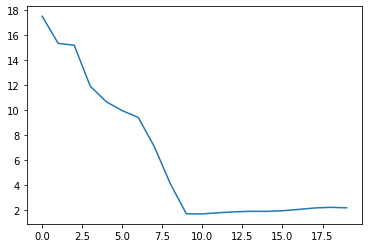

In [5]:
# now we plot the MSE vs the rank
plt.plot(mse)


__Exercise 4__ (30 pts)

The dataset in the hw1 directory has a Y variable, 7 predictor variables (X1 - X7).  Using sklearn and the class that you constructed above, compare ridge regression, OLS, kNN, and SingularValueRegressor.  Compare and tune the methods using appropriate testing procedures.  Comment on the tuning of each parameter in ridge, kNN, and SingularValueRegressor in markdown.  Be sure to standardize the X variables first and decide how to deal with NAs.  

In [6]:
import pandas as pd
import numpy as np
from scipy.linalg import svd
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sklearn.model_selection as CrossValidate

In [7]:
data_mat = pd.read_csv('hw1_data.csv')
data_mat.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [8]:
data_mat.describe()

,Y,X1,X2,X3,X4,X5,X6,X7
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
# check for nans
isNulls = data_mat.isnull().values == True
numNulls = np.sum(isNulls)
print("the count of nulls is = ", numNulls)
meanX3 = data_mat.describe().X3['mean']
print("the mean of X3 is ", meanX3)


the count of nulls is =  6
the mean of X3 is  104.46938775510205


In [10]:
data_mat[isNulls]

,Y,X1,X2,X3,X4,X5,X6,X7
32,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0
126,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0
330,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0
336,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0
354,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0
374,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0


Here we can see that we have 6 Null values in the table.
We can replace the mean in their stead. They are all in column X3 and the mean in column 3 is 104.469388.

In [11]:
data_mat["X3"] = data_mat["X3"].fillna(meanX3)
data_mat[isNulls]

,Y,X1,X2,X3,X4,X5,X6,X7
32,25.0,4.0,98.0,104.469388,2046.0,19.0,71.0,1.0
126,21.0,6.0,200.0,104.469388,2875.0,17.0,74.0,1.0
330,40.9,4.0,85.0,104.469388,1835.0,17.3,80.0,2.0
336,23.6,4.0,140.0,104.469388,2905.0,14.3,80.0,1.0
354,34.5,4.0,100.0,104.469388,2320.0,15.8,81.0,2.0
374,23.0,4.0,151.0,104.469388,3035.0,20.5,82.0,1.0


In [12]:
# check to see if any other Nulls remain
data_mat[data_mat.isnull().values == True]

,Y,X1,X2,X3,X4,X5,X6,X7


In [13]:
# now we split the data to X and y arrays
y = np.array(data_mat["Y"])
print(y.shape)
del data_mat["Y"] 
X = np.array(data_mat)
n,p = X.shape
print(X.shape)

(398,)
(398, 7)


In [14]:
# standardizing the data
Scaler = StandardScaler()
Scaler.fit(X)
X_std = Scaler.transform(X)

In [19]:
# K-fold cross validation 
def CrossValKF (model, X , K = 10):
    n,_ = X.shape
    kf = CrossValidate.KFold(n_splits = K)
    squared_errorsList = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        model.fit(X_train,y_train)
        error = (model.predict(X_val)-y_val)
        squared_errorsList.append(error**2)
    return np.mean(squared_errorsList)

In [20]:
# cross validation with Leave one out
def CrossValLOO (model, X):
    loo = CrossValidate.LeaveOneOut()
    squared_errorsList = []
    for train_index, val_index in loo.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        model.fit(X_train,y_train)
        error = (model.predict(X_val)-y_val)
        squared_errorsList.append(error**2)
    return np.mean(squared_errorsList)

# OLS

In [21]:
# in the sklearn LinearRegression api, the intercept is added automatically
# Linear regression training loss
LinReg = LinearRegression(fit_intercept = True)
LinReg.fit(X_std,y)
mseOLS = metrics.mean_squared_error(y,LinReg.predict(X_std))
print("the MSE loss is = ", mseOLS)

the MSE loss is =  10.91354224883868


In [22]:
# Linear regression leaveone out cross validation loss
LinReg = LinearRegression(fit_intercept = True)
LinReg.fit(X_std,y)

looOLS = CrossValLOO(LinReg,X_std)

print ("the cross validation loss from Leave one out is =",looOLS)

the cross validation loss from Leave one out is = 11.43946607811117


In [23]:
# Linear regression K-Fold cross validation loss
LinReg = LinearRegression(fit_intercept = True)
LinReg.fit(X_std,y)

print ("the cross validation loss from 2 fold Cross Validation is =",
CrossValKF(LinReg,X_std, K = 2))

LinReg = LinearRegression(fit_intercept = True)
LinReg.fit(X_std,y)
print ("the cross validation loss from 199 fold Cross Validation is =",
CrossValKF(LinReg,X_std, K = 199))

LinReg = LinearRegression(fit_intercept = True)
LinReg.fit(X_std,y)
print ("the cross validation loss from N fold Cross Validation is =",CrossValKF(LinReg,X_std, K = n))

the cross validation loss from 2 fold Cross Validation is = 27.300447048699045
the cross validation loss from 199 fold Cross Validation is = 11.554295762496302
the cross validation loss from N fold Cross Validation is = 11.43946607811117


As we can see cross Validation loss of $K-Fold$ cross validation for $K = N = 398$ is the same as the Leave One Out Cross Validation techniques.

# Ridge Regression

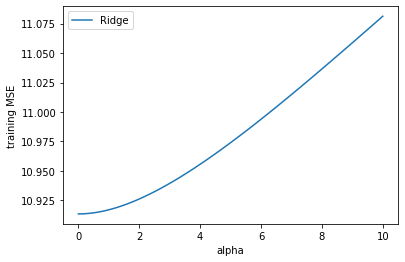

In [24]:
# Ridge regression sweeping over alpha training loss
ridgeModels = [Ridge(alpha = alpha, fit_intercept=True).fit(X_std,y) for alpha in np.arange(0, 10.001, 0.1)]
mseRidge = [metrics.mean_squared_error(y,m.predict(X_std)) for m in ridgeModels]

plt.plot(np.arange(0, 10.001, 0.1), mseRidge, label="Ridge")
plt.ylabel("training MSE")
plt.xlabel("alpha")
plt.legend()

In [25]:
# Ridge regression sweeping over alpha leaveone out cross validation loss
ridgeModels = [Ridge(alpha = alpha, fit_intercept=True).fit(X_std,y) for alpha in np.arange(0, 10.001, 0.1)]

looRidge = [CrossValLOO(m,X_std) for m in ridgeModels]

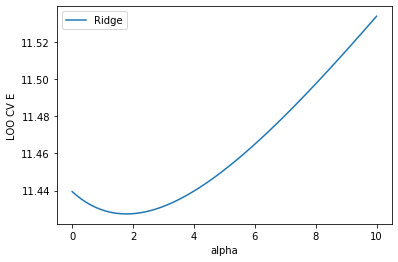

In [26]:
plt.plot(np.arange(0, 10.001, 0.1), looRidge, label="Ridge")
plt.ylabel("LOO CV E")
plt.xlabel("alpha")
plt.legend()

We can find the $K$-Fold cross Validation error for $K = 2$ and $ K = 199$ easily as well.

# KNN

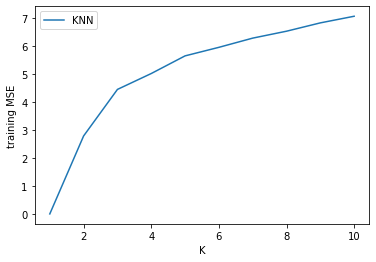

In [27]:
# KNN regression sweeping over K training loss
knnModels = [KNeighborsRegressor(n_neighbors = K).fit(X_std,y) for K in range (1,11)]

mseKNN = [metrics.mean_squared_error(y,m.predict(X_std)) for m in knnModels]
plt.plot( range (1,11), mseKNN,label="KNN")
plt.ylabel("training MSE")
plt.xlabel("K")
plt.legend()

In [28]:
# KNN regression sweeping over K leaveone out cross validation loss
knnModels = [KNeighborsRegressor(n_neighbors = K).fit(X_std,y) for K in range (1,11)]

looKNN = [CrossValLOO(m,X_std) for m in knnModels]

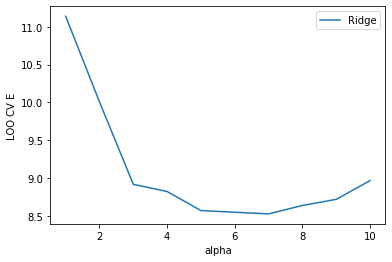

In [29]:
plt.plot(range (1,11), looKNN, label="Ridge")
plt.ylabel("LOO CV E")
plt.xlabel("alpha")
plt.legend()

We can find the $K$-Fold cross Validation error for $K = 2$ and $ K = 199$ easily as well.

# SVR

In [30]:
# our api doesn't take intercept into account
X_std_inter = np.hstack((np.ones((n,1)),X_std))

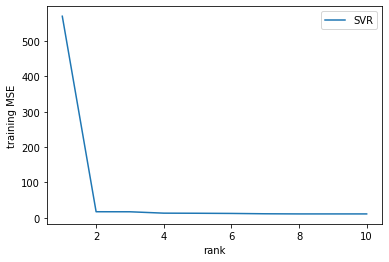

In [31]:
# SVR regression sweeping over r significant singular values training loss
SVR = SingularValueRegressor(r=1)
SVR.fit(X_std_inter,y)

y_predSVR = [SVR.change_rank(r=r).predict(X_std_inter) for r in range(1,11)]
# becuase all models share the same structure, we can't save all models in a list and predict later in a loop over the models
# the error has to be calculated right at changing rank time

# calculating the mse for predicted y of each model
mseSVR = [metrics.mean_squared_error(y,y_pred_) for y_pred_ in y_predSVR]
plt.plot( range (1,11), mseSVR, label="SVR")
plt.ylabel("training MSE")
plt.xlabel("rank")
plt.legend()


In [32]:
# SVR regression sweeping over r significant singular values cross validation loss
X_std_inter = np.hstack((np.ones((n,1)),X_std))

SVR = SingularValueRegressor(r=1)
SVR.fit(X_std_inter,y)

looSVR = [CrossValLOO(SVR.change_rank(r=r), X_std_inter) for r in range(1,11)]

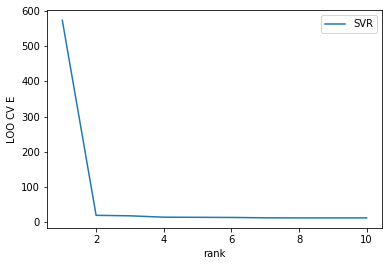

In [33]:
plt.plot( range (1,11), looSVR, label="SVR")
plt.ylabel("LOO CV E")
plt.xlabel("rank")
plt.legend()

We can find the $K$-Fold cross Validation error for $K = 2$ and $ K = 199$ easily as well.

# Compare All

(5, 20)

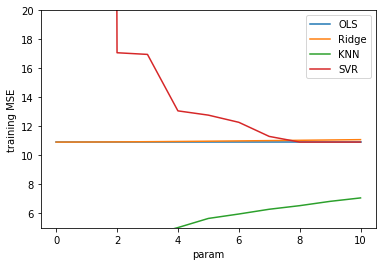

In [34]:
# all training losses in the same graph limit range to 5-20
# OLS is spanned across x axis so that it can be compared, this is not to say that we have a variable in OLS
plt.plot(np.arange(0, 10.001, 0.1), [mseOLS]*len(np.arange(0, 10.001, 0.1)),label="OLS")
plt.plot(np.arange(0, 10.001, 0.1), mseRidge, label="Ridge")
plt.plot( range (1,11), mseKNN,label="KNN")
plt.plot( range (1,11), mseSVR, label="SVR")
plt.ylabel("training MSE")
plt.xlabel("param")
plt.legend()
plt.ylim(5,20)

(5, 20)

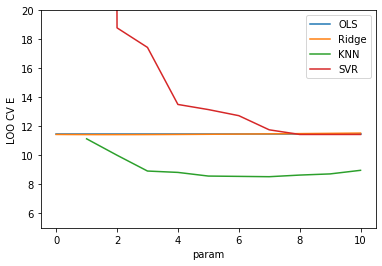

In [35]:
# all Leave one out Cross Validation errors in the same graph limit range to 5-20
# OLS is spanned across x axis so that it can be compared, this is not to say that we have a variable in OLS
plt.plot(np.arange(0, 10.001, 0.1), [looOLS]*len(np.arange(0, 10.001, 0.1)),label="OLS")
plt.plot(np.arange(0, 10.001, 0.1), looRidge, label="Ridge")
plt.plot( range (1,11), looKNN,label="KNN")
plt.plot( range (1,11), looSVR, label="SVR")
plt.ylabel("LOO CV E")
plt.xlabel("param")
plt.legend()
plt.ylim(5,20)

- We can clearly ssee that predicting the X after fitting over X is not enough and infact that error of prediction over X from y is the training error and isn't a very useful indicator for the models.
- So we use a Cross Validation Technique like Leave One Out to calculate the mean cross validation loss.
- Leave one Out CV is the same as $K$-fold Cross Validation Techniques when $K = N$
- Ridge Regression doesn't have much difference from the normal Linear Regression
- KNN for parameter $K = 6$ has the least Error in these models for the dataset
- Singular Value Regression has the largest error especially when we only select only one Singular Value and dump all the other singular Values. This Technique has Computational benefit in the sense that we don't need to calculate large matrices but at the expense of some bias.
- SVR with having $r = p$ is just the same as Linear Regression

# Notes

Some notes for the NAs, you need to replace the NAs somehow to use these methods.  The SimpleImputer will replace the NAs with the mean,median, etc.  You can fit this on the training data and use this to transform for the test set.  We can see that any imputer that is fit only on the training set also can give you that the test error is an unbiased risk estimator.  Let $\hat I$ be the imputer transform and $\hat f$ be any trained predictor.

$$\hat I: R^p \to R^{p}$$
$$\hat f: R^{p} \to R$$

For example,
$(\hat I(x))_j = $ $x_j$ if non-missing and $\hat \mu_j$ if missing 
or you could add a missingness indicator,
$$\hat I_2: R^p \to R^{2p}$$

$(\hat I_2(x))_j = $ $x_j$ if non-missing and $\hat \mu_j$ if missing for $j =1,\ldots,p$

$(\hat I_2(x))_{p+j} = $ $0$ if non-missing and $1$ if missing for $j =1,\ldots,p$

The trained predictor could be linear,
ex. $\hat f(\hat I(x)) = \hat I(x)^\top \hat \beta$

Then we can combine these steps into one predictor,
$\hat g(x) = \hat f (\hat I (x))$.

The test error is still an unbiased risk estimator,
$$\frac{1}{n_t} \sum_{i=n_0+1}^{n_0+n_t} (y_i - \hat g(x_i))^2.$$